# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


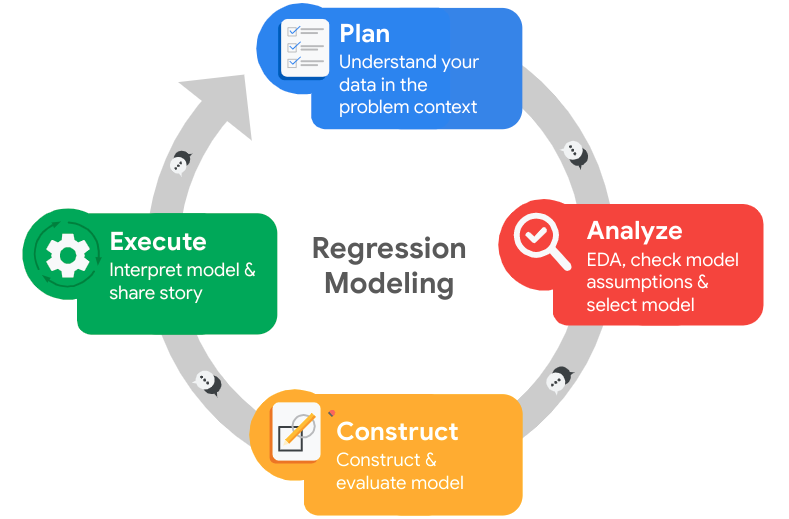

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
The stakeholders are HR department and senior leadership team.
The objective of the project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.
There are 9 features are liekly to contribute for the prediction of "left" column whether or not an employee will leave the company
The resources will be Jupyter notebook and the libraries needed while performing the analysis job
Need to prevent bias in the data model, because if there are problems with the data, then prediction may not be accurate. In the contexts of this business problem, this may lead to wrong identification and recommendation for the factors that contribute to employee's leaving.   

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [12]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [4]:
# Rename columns as needed
### YOUR CODE HERE ###
df0=df0.rename(columns={"satisfaction_level":"Satisfaction_level", "last_evaluation":"Last_evaluation", "number_project":"Number_project", "average_montly_hours":"Average_monthly_hours", "time_spend_company":"Tenure", "left":"Left", "promotion_last_5years":"Promotion_last_5years"})

# Display all column names after the update
### YOUR CODE HERE ###
df0

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

Check for any missing values in the data.

In [64]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

Satisfaction_level       0
Last_evaluation          0
Number_project           0
Average_montly_hours     0
Time_spend_company       0
Work_accident            0
Left                     0
Promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [65]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [66]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]


,Satisfaction_level,Last_evaluation,Number_project,Average_montly_hours,Time_spend_company,Work_accident,Left,Promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_subset=df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_subset

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

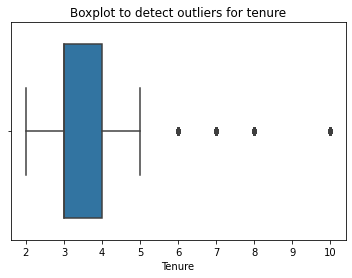

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(x=df0_subset["Tenure"] )
plt.title("Boxplot to detect outliers for tenure")
plt.show()

In [8]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
df0_25=df0_subset["Tenure"].quantile(0.25)
df0_75=df0_subset["Tenure"].quantile(0.75)
iqr=df0_75-df0_25
upper_limit=df0_75+(1.5*iqr)
lower_limit=df0_25-(1.5*iqr)
print("upper_limit: ", upper_limit)
print("lower_limit: ", lower_limit)
df0_subset[(df0_subset["Tenure"]>upper_limit) | (df0_subset["Tenure"]<lower_limit)]

upper_limit:  5.5
lower_limit:  1.5


,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


In [8]:
df0_subset_no_outliers=df0_subset[(df0_subset["Tenure"]<=upper_limit) | (df0_subset["Tenure"]>=lower_limit)]
df0_subset_no_outliers

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



In [214]:
df0_subset.corr()

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years
Satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
Last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
Number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
Average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
Tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
Left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
Promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


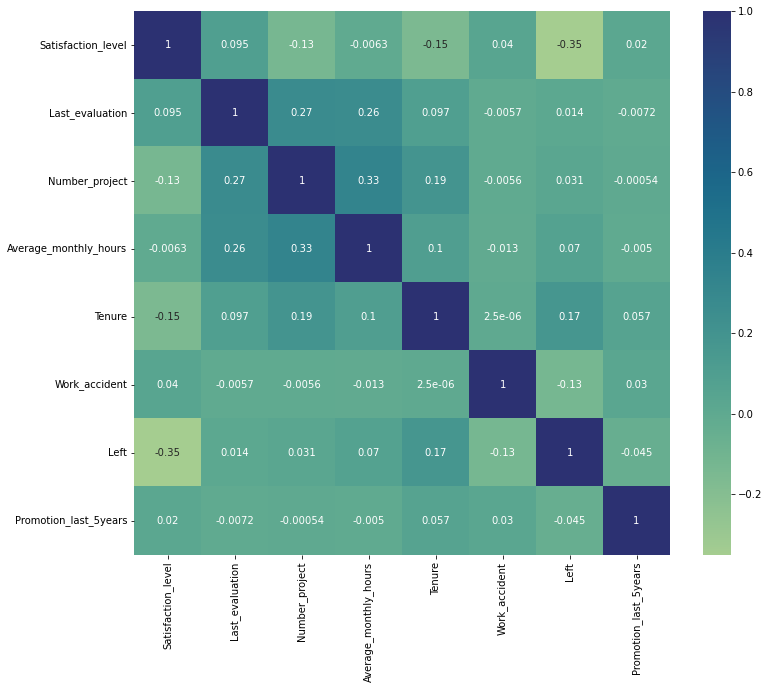

In [215]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df0_subset.corr(), annot=True, cmap="crest")
plt.show()

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]
One of the model assumptions for logistic regression is no severe multicollinearity among the features. Based on the heatmap, there is no multicollinearity between variables


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
percentage=df0_subset["Left"].value_counts(normalize=True).reset_index(drop=True)
print("percentages of people who left: {left:.3f}%".format(left=percentage[0]*100))
print("percentages of people who stayed: {stayed:.3f}%".format(stayed=percentage[1]*100))

percentages of people who left: 83.396%
percentages of people who stayed: 16.604%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

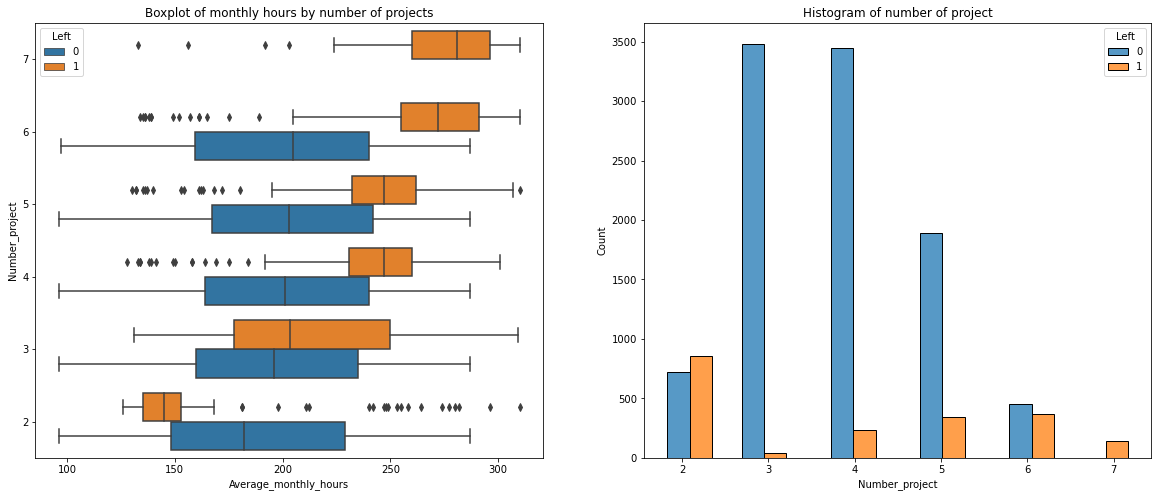

In [211]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data=df0_subset, y="Number_project", x="Average_monthly_hours", hue="Left", orient="h", ax=ax[0])
ax[0].set_title("Boxplot of monthly hours by number of projects")
ax[0].invert_yaxis()
sns.histplot(data=df0_subset, x="Number_project", hue="Left", ax=ax[1], multiple="dodge", shrink=3)
ax[1].set_title("Histogram of number of project")
plt.show()

In [210]:
df0_subset[df0_subset["Number_project"]==7]["Left"].value_counts()

1    145
Name: Left, dtype: int64

1. Based on the data visualizations, there are 2 groups of people who left the company: (A) those who worked less than their peers and (B)those who worked much more than their peers. Of those group A, it could be they were fired.It's also possible that, they had given their notice for resignation and they were assigned less hours. For those in group B, it's resonable to deduce that they probably quit. They could be contributed the most the project.
2. Everyone with 7 projects left the company and the interquartile for this group and those with 6 projects has a range of ~255-295 hours/month, which is much more higher than other groups.
3. Optimal number for employees to work on seems to be 3-4 with the small ratio of left/stayed.
4. Assuming a work week of 40 hours and 2 weeks of vacation per year, it would be 40*50/12 months =166.67 hours per month. This means that other than those employees worked on 2 projects, every group, even those who didnt leave the company worked considerable more hours than this. It seems that the employees are overworked. 

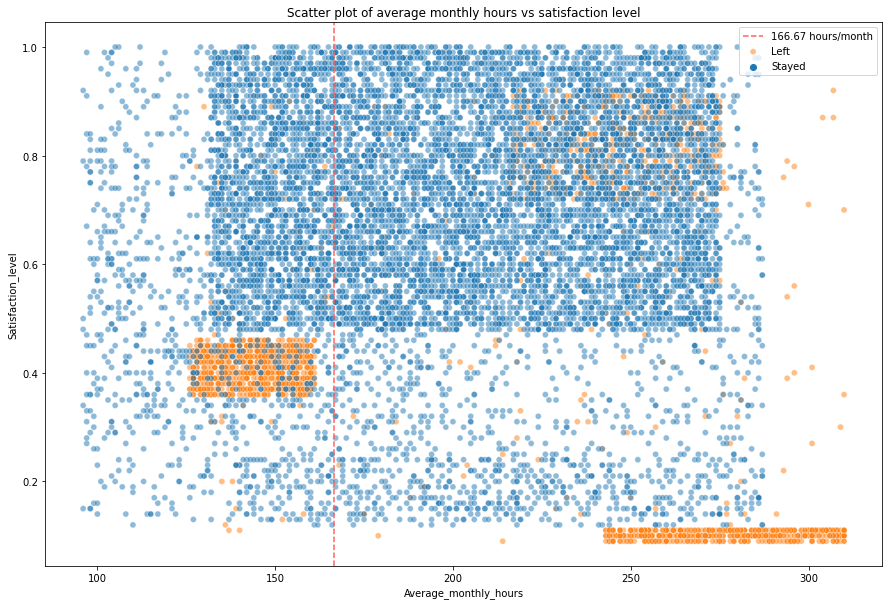

In [208]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,10))
sns.scatterplot(data=df0_subset, x="Average_monthly_hours", y="Satisfaction_level", hue="Left", alpha=0.5)
plt.axvline(x=166.67, color="#ff6360", label="166.67 hours/month", ls="--")
plt.legend(["166.67 hours/month", "Left", "Stayed"])
plt.title("Scatter plot of average monthly hours vs satisfaction level")
plt.show()

There is a group of employees worked within ~240-315 has satisfaction levels close to zero. 315 hours is over 75 hours a week. 

The plot also shows another group of employess who had a more normal working hours but the satisfaction level is around 0.4. It's difficult to conclude about why they might have left. It could be they felt pressured to work more, considering many of their peers worked more. This could have lowered their satisfication level.

There is another group of employees who worked ~215-275 hours/month but had satisfaction levels ~ 0.7-0.9.

The strange shape of distributions could have indicated data manipulation or synthetic data.



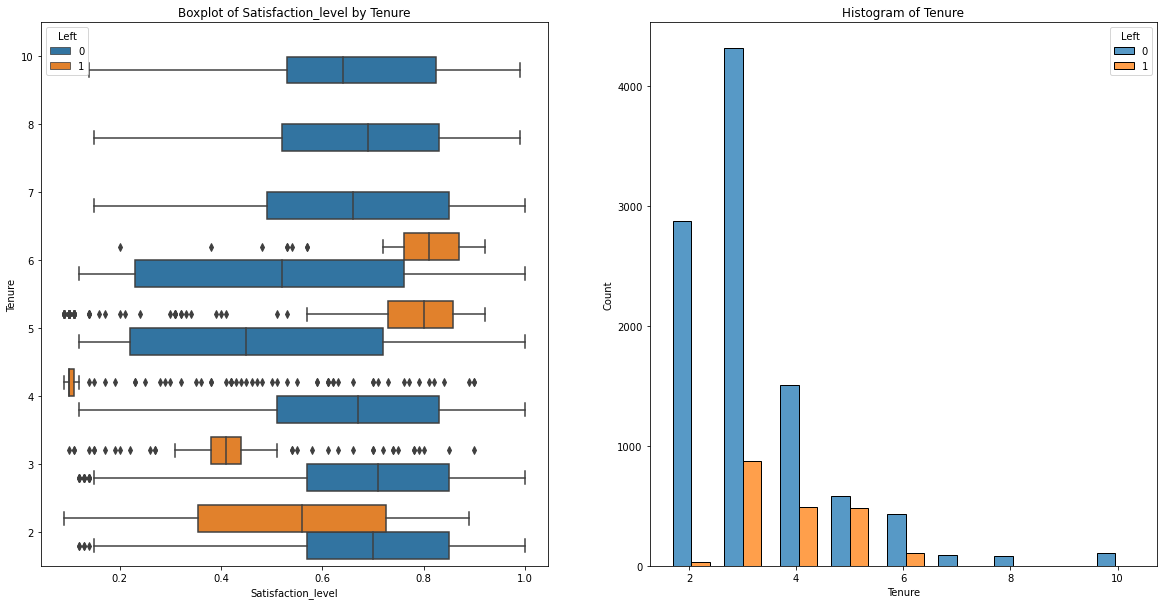

In [207]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax=plt.subplots(1,2, figsize=(20,10))
sns.boxplot(data=df0_subset, x="Satisfaction_level", y="Tenure", hue="Left",orient="h",ax=ax[0] )
ax[0].invert_yaxis()
ax[0].set_title("Boxplot of Satisfaction_level by Tenure")
sns.histplot(data=df0_subset, x="Tenure", hue="Left", multiple="dodge", ax=ax[1], shrink=8)
ax[1].set_title("Histogram of Tenure")
plt.show()

There are 2 categoroies for employees who left the company: (A) dissatisfied employees with shorter tenures and (B)very satisfied employees with medium-length tenures.
Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [205]:
# Create a plot as needed
### YOUR CODE HERE ###
df0_subset[["Left", "Satisfaction_level"]].groupby("Left").agg(["mean","median"])["Satisfaction_level"]

,mean,median
Left,,
0,0.667365,0.69
1,0.440271,0.41


The mean and median score of satisfaction level for stayed employee are higher than left empoyees as excpected.
The mean is lower than median, this may indicate the the distribution is skewed to the left

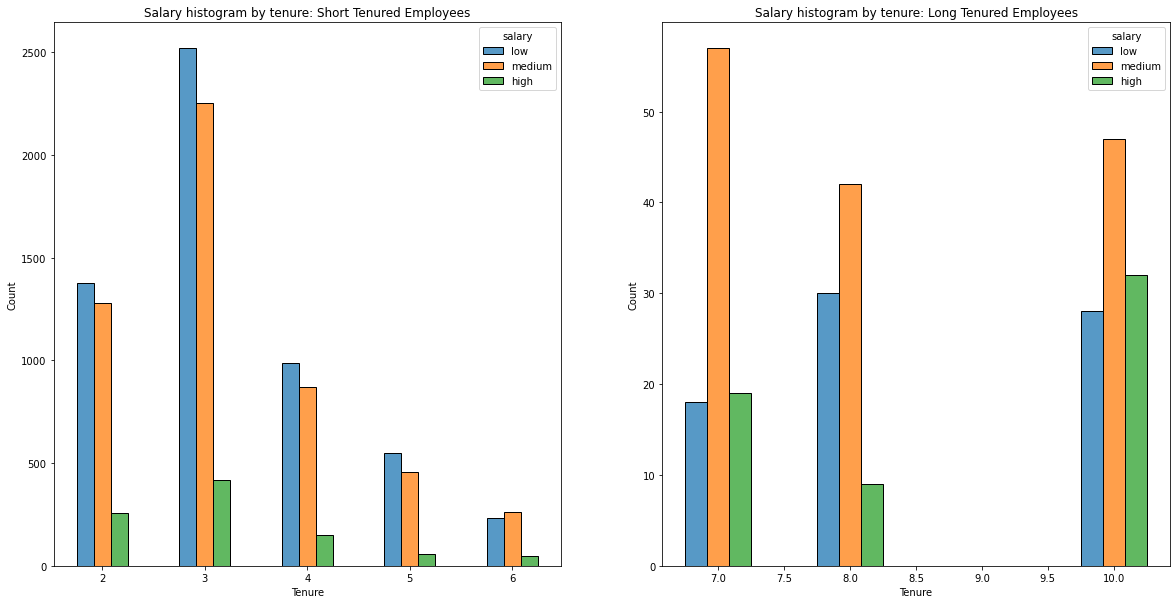

In [202]:
# Create a plot as needed
### YOUR CODE HERE ###
df0_subset_shorttenure=df0_subset[df0_subset["Tenure"]<7]
df0_subset_longtenure=df0_subset[df0_subset["Tenure"]>6]
fig,ax=plt.subplots(1,2, figsize=(20,10))
sns.histplot(data=df0_subset_shorttenure, x="Tenure", discrete=1, shrink=.5, multiple="dodge", hue="salary", hue_order=["low", "medium", "high"], ax=ax[0])
ax[0].set_title("Salary histogram by tenure: Short Tenured Employees")
sns.histplot(data=df0_subset_longtenure, x="Tenure", discrete=1, shrink=.5, multiple="dodge", hue="salary", hue_order=["low", "medium", "high"], ax=ax[1])
ax[1].set_title("Salary histogram by tenure: Long Tenured Employees")
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.



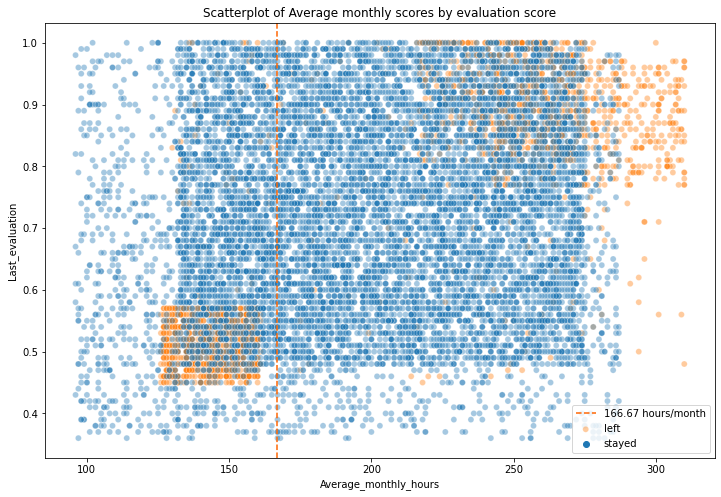

In [231]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,8))
sns.scatterplot(data=df0_subset, x="Average_monthly_hours", y="Last_evaluation", hue="Left", alpha=0.4)
plt.title("Scatterplot of Average monthly scores by evaluation score")
plt.axvline(x=166.67, label="166.67 hours/month", ls="--", color="#ff6501")
plt.legend(["166.67 hours/month", "left", "stayed"])
plt.show()

The following observations can be made from the scatterplot above:

The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
There seems to be a correlation between hours worked and evaluation score.
There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
Most of the employees in this company work well over 167 hours per month.

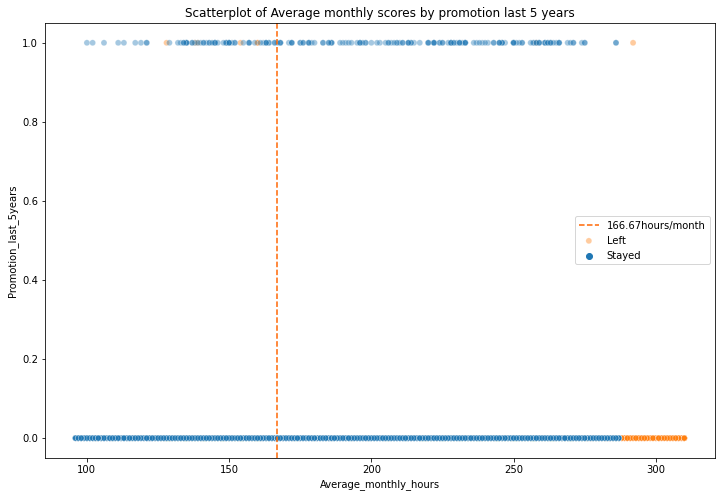

In [236]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12,8))
sns.scatterplot(data=df0_subset, x="Average_monthly_hours", y="Promotion_last_5years", hue="Left", alpha=0.4)
plt.axvline(x=166.67, label="166.67hours/month", color="#ff6501", ls="--")
plt.title("Scatterplot of Average monthly scores by promotion last 5 years")
plt.legend(["166.67hours/month", "Left", "Stayed"])

The plot above shows the following:

very few employees who were promoted in the last five years left
very few employees who worked the most hours were promoted
all of the employees who left were working the longest hours

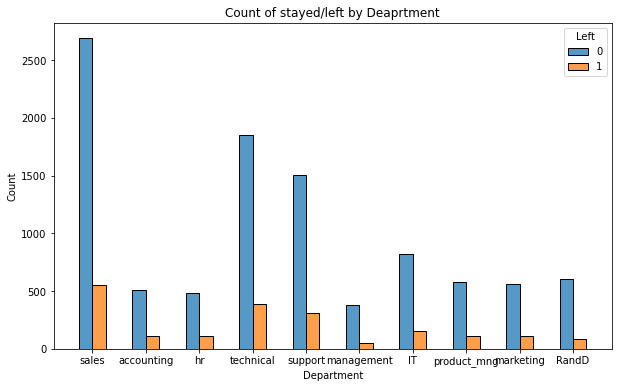

In [242]:
# Create a plot as needed
### YOUR CODE HERE ###
df0_subset["Department"].value_counts()
plt.figure(figsize=(10,6))
sns.histplot(data=df0_subset, x="Department", hue="Left", discrete=1, shrink=0.5, multiple="dodge")
plt.title("Count of stayed/left by Deaprtment")
plt.show()

The proportion of employees who left to those who stayed for any department do not seem to differ significantly

Text(0.5, 1.0, 'Correlation heatmap')

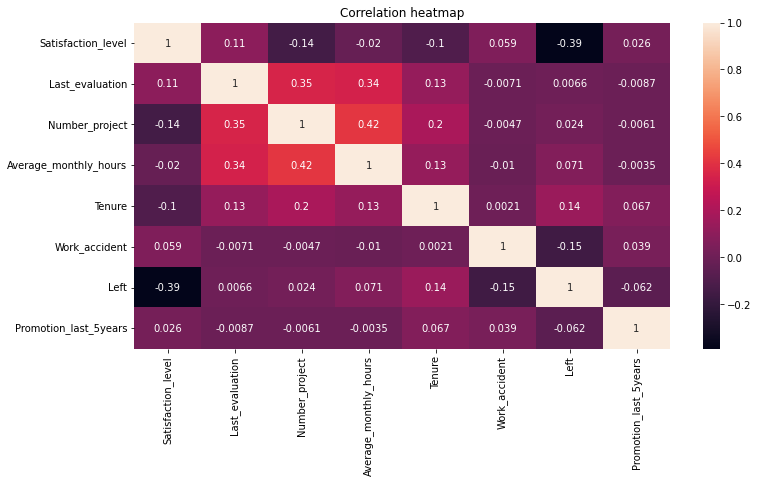

In [245]:
plt.figure(figsize=(12,6))
sns.heatmap(data=df0.corr(), annot=True)
plt.title("Correlation heatmap")

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]
Based on the observations, it can be deduced that employees are leaving the company as a result of poor management. The leaving of employees is correlated to longer working hours, many projects, and generally lower satisfaction levels. It can be dissapointing to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are overworked. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data



 Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]
The prediction task is a classification tasks and the dependent variable will be "Left" column to predict whether employees will stay or leave which involves binary classification

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]
The task can be completed with tree-based model classifier or logistic regression. 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [9]:
### YOUR CODE HERE ###
df1=df0_subset.copy()
df1["salary"]=df1["salary"].astype("category").cat.set_categories(["low","medium", "high"]).cat.codes
df1=pd.get_dummies(data=df1, columns=["Department"], drop_first=False)
df1

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


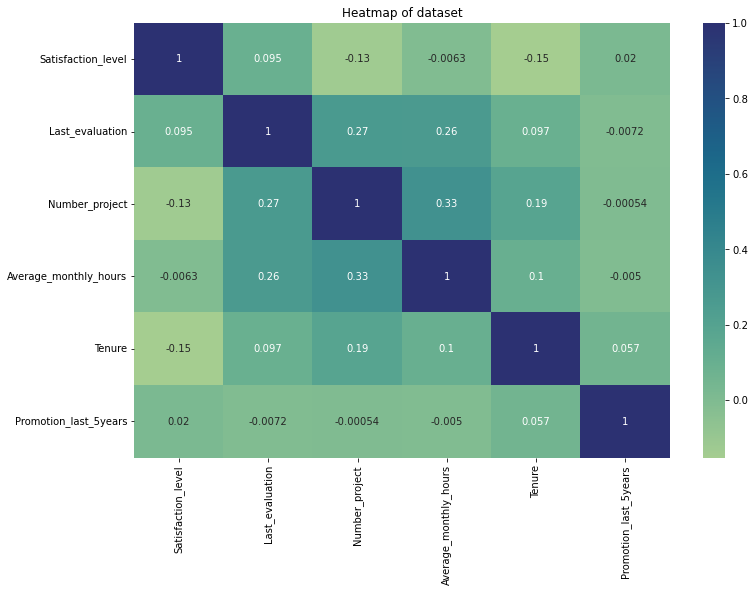

In [259]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df1[["Satisfaction_level", "Last_evaluation", "Number_project", "Average_monthly_hours", "Tenure", "Promotion_last_5years"]].corr(), annot=True, cmap="crest" )
plt.title("Heatmap of dataset")
plt.show()

Based on the heatmap above, the multicollinearity assumption is met and there is no obvious multicollinearity between the independent variables

In [10]:
df1=df1[(df1["Tenure"]<=upper_limit) & (df1["Tenure"]>=lower_limit)]
df1

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [11]:
y=df1["Left"]
y

0        1
2        1
3        1
4        1
5        1
        ..
11985    0
11986    0
11987    0
11992    0
11999    0
Name: Left, Length: 11167, dtype: int64

In [12]:

x=df1.drop(columns=["Left"])
x

,Satisfaction_level,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.72,0.64,4,192,3,0,0,1,0,0,0,0,0,0,0,1,0,0
11986,0.48,0.50,5,142,4,0,0,1,1,0,0,0,0,0,0,0,0,0
11987,0.19,0.79,4,229,4,0,0,1,0,0,0,0,0,0,1,0,0,0
11992,0.62,0.85,3,237,3,1,0,1,1,0,0,0,0,0,0,0,0,0


In [13]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)
lr=LogisticRegression(random_state=42, max_iter=500).fit(x_train, y_train)


In [14]:
y_pred=lr.predict(x_test)

[]

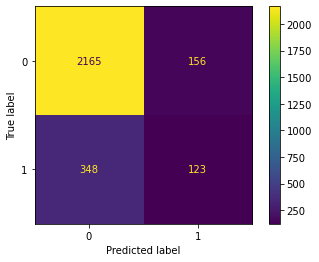

In [289]:
lr_cm=confusion_matrix(y_test, y_pred, labels=lr.classes_)
lr_displays=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
lr_displays.plot(values_format="")
plt.plot()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

The model has 348 false negative out of 471 actual positive, this shows that the model doesnt have good predictive power

In [291]:
target_names=["Employees stayed", "Employees left"]
lr_classification_report=classification_report(y_test, y_pred, target_names=target_names)
print(lr_classification_report)
#lr_precision=

                  precision    recall  f1-score   support

Employees stayed       0.86      0.93      0.90      2321
  Employees left       0.44      0.26      0.33       471

        accuracy                           0.82      2792
       macro avg       0.65      0.60      0.61      2792
    weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

In [24]:
##DeicionTreeClassifier
df1=df0_subset.copy()
df1["salary"]=df1["salary"].astype("category").cat.set_categories(["low","medium", "high"]).cat.codes
df1=pd.get_dummies(data=df1, columns=["Department"], drop_first=False)
df1
x=df1.drop(columns=["Left"])
y=df1["Left"]

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)
dt=DecisionTreeClassifier(random_state=0)


In [26]:
dt_params={"max_depth":[4,6,8,None], "min_samples_split":[2,4,6], "min_samples_leaf":[2,5,1]}
scoring={"precision", "recall", "accuracy", "f1", "roc_auc"}
dt_cv=GridSearchCV(dt, dt_params, scoring=scoring, cv=4, refit="roc_auc")


In [27]:
dt_cv.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [28]:
dt_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [29]:
dt_cv.best_score_

0.969819392792457

In [332]:
dt_cv.cv_results_

{'mean_fit_time': array([0.00792533, 0.0076524 , 0.00760078, 0.00771087, 0.00786638,
        0.00762427, 0.00783068, 0.00798398, 0.00762558, 0.01035941,
        0.01025677, 0.01013029, 0.01008099, 0.0102101 , 0.01019824,
        0.01026219, 0.01024264, 0.01025248, 0.01265872, 0.01272088,
        0.01273197, 0.01267678, 0.01261622, 0.01336932, 0.01344812,
        0.01292586, 0.01282179, 0.0170719 , 0.01699942, 0.0169614 ,
        0.01685005, 0.01684153, 0.01658261, 0.01791507, 0.01782119,
        0.01766974]),
 'std_fit_time': array([1.18466252e-04, 6.36047194e-05, 1.25044238e-04, 7.07121883e-05,
        4.46285574e-05, 9.45365744e-05, 3.92343018e-05, 3.78862290e-04,
        8.64222131e-05, 1.07746405e-04, 7.33932397e-05, 7.58586139e-05,
        7.10192031e-05, 6.52087617e-05, 1.14365580e-04, 1.03651689e-04,
        2.20826159e-05, 6.56456886e-05, 9.41594177e-05, 1.32637184e-04,
        1.63521375e-04, 1.29496561e-04, 8.38798739e-05, 7.79961393e-04,
        1.67540461e-04, 3.13107369e-0

In [33]:
def cv_results(model_name, model_object):
    model_object.cv_results_
    df_cv=pd.DataFrame(model_object.cv_results_)
    df_cv_result=df_cv.iloc[df_cv["mean_test_roc_auc"].idxmax(), :]
    precision=df_cv_result.mean_test_precision
    recall=df_cv_result.mean_test_recall
    accuracy=df_cv_result.mean_test_accuracy
    f1=df_cv_result.mean_test_f1
    roc_auc=df_cv_result.mean_test_roc_auc
    cv_dataframe=pd.DataFrame({"Name":[model_name], "Preicsion":[precision], "Recall":[recall], "Accuracy": [accuracy], "f1":[f1], "ROC_AUC":[roc_auc]})
    return cv_dataframe


In [34]:
cv_results("Decision Tree", dt_cv)

,Name,Preicsion,Recall,Accuracy,f1,ROC_AUC
0,Decision Tree,0.914552,0.916949,0.971978,0.915707,0.969819


All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

In [35]:
rf=RandomForestClassifier(random_state=0)
rf_params={"max_depth":[3,5,None], "min_samples_leaf":[1,2,3], "min_samples_split":[2,3,4], "max_features":[1.0], "n_estimators":[300, 500], "max_samples":[0.7,1.0]}
scoring={"precision", "recall", "accuracy", "f1", "roc_auc"}
rf_cv=GridSearchCV(rf, rf_params, scoring=scoring, cv=4, refit="roc_auc")


In [36]:
%%time
rf_cv.fit(x_train, y_train)

CPU times: user 9min 32s, sys: 0 ns, total: 9min 32s
Wall time: 9min 32s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [36]:
path='/home/jovyan/work/'
with open (path+"rf_cv.pickle", "wb") as to_write:
    pickle.dump(rf_cv, to_write)

In [37]:
path='/home/jovyan/work/'
with open (path+"rf_cv.pickle", "rb") as to_read:
    rf_cv=pickle.load(to_read)

In [38]:
rf_cv.best_score_

0.9818158627884357

In [39]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [48]:
print(cv_results("decision_tree", dt_cv))
print(cv_results("random forest", rf_cv))

            Name  Preicsion   Recall  Accuracy        f1   ROC_AUC
0  decision_tree   0.955522  0.91497  0.978508  0.934765  0.974382
            Name  Preicsion   Recall  Accuracy        f1   ROC_AUC
0  random forest   0.970653  0.91497  0.981015  0.941924  0.981816


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is the same with decision tree recall score. This indicates that the random forest model mostly outperforms the decision tree model.



In [40]:
y_pred=rf_cv.best_estimator_.predict(x_test)

In [41]:
def best_estimator (model_name, y_data):
    precision=precision_score(y_test, y_data)
    recall=recall_score(y_test, y_data)
    accuracy=accuracy_score(y_test, y_data)
    f1=f1_score(y_test, y_data)
    roc_auc=roc_auc_score(y_test, y_data)
    table =pd.DataFrame({"model_name":[model_name], "precision":[precision], "recall":[recall], "accuracy":[accuracy], "f1":[f1], "roc_auc":[roc_auc]})
    return table

In [42]:
best_estimator ("random_forest", y_pred)

,model_name,precision,recall,accuracy,f1,roc_auc
0,random_forest,0.968487,0.925703,0.982655,0.946612,0.959851


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

In [48]:
df2=df1.drop(columns=["Satisfaction_level"])
df2

,Last_evaluation,Number_project,Average_monthly_hours,Tenure,Work_accident,Left,Promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


In [19]:
print("max average month hours: ",df2["Average_monthly_hours"].max())
print("min average month hours: ",df2["Average_monthly_hours"].min())

max average month hours:  310
min average month hours:  96


In [49]:
df2["overworked"]=(df2["Average_monthly_hours"]>175).astype("int")
df2["overworked"]

0        0
1        1
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    1
11998    0
11999    1
Name: overworked, Length: 11991, dtype: int64

In [50]:
df2=df2.drop(columns=["Average_monthly_hours"])

In [51]:
y=df2["Left"]
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: Left, Length: 11991, dtype: int64

In [52]:
x=df2.drop(["Left"], axis=1)
x

,Last_evaluation,Number_project,Tenure,Work_accident,Promotion_last_5years,salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.55,3,10,1,1,2,0,0,0,0,1,0,0,0,0,0,1
11996,0.95,5,10,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11997,0.54,3,10,0,1,2,0,0,0,0,1,0,0,0,0,0,1
11998,0.65,3,10,0,1,2,0,0,0,0,0,1,0,0,0,0,0


In [53]:
x_train,x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, stratify=y, random_state=0)

In [54]:
dt2=DecisionTreeClassifier(random_state=0)
dt2_params={"max_depth":[4,6,8,None], "min_samples_leaf":[2,5,1], "min_samples_split":[2,4,6]}
scoring={"precision", "recall", "accuracy", "f1", "roc_auc"}
dt2_cv=GridSearchCV(dt2, dt2_params, scoring=scoring, cv=4, refit="roc_auc")

In [55]:
dt2_cv.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [51]:
dt2_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [52]:
dt2_cv.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [56]:
cv_results("DecisionTree2",dt2_cv)

,Name,Preicsion,Recall,Accuracy,f1,ROC_AUC
0,DecisionTree2,0.856693,0.903553,0.958523,0.878882,0.958675


It can be observed thats some of the scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

In [59]:
rf2=RandomForestClassifier(random_state=0)
rf2_params={"max_depth":[3,5,None], "min_samples_leaf":[1,2,3], "min_samples_split":[2,3,4], "max_features":[1.0], "n_estimators":[300, 500], "max_samples":[0.7,1.0]}
scoring={"precision", "recall", "accuracy", "f1", "roc_auc"}
rf2_cv=GridSearchCV(rf2, rf2_params, scoring=scoring, cv=4, refit="roc_auc")


In [60]:
rf2_cv.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [63]:
path='/home/jovyan/work/'
with open (path+"rf2_cv.pickle", "wb") as to_write:
    pickle.dump(rf2_cv, to_write)

In [64]:
path='/home/jovyan/work/'
with open (path+"rf2_cv.pickle", "rb") as to_read:
    rf2_cv=pickle.load(to_read)

In [61]:
rf2_cv.best_score_

0.9648100662833985

In [66]:
rf2_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [62]:
cv_results("Randomforest2", rf2_cv)

,Name,Preicsion,Recall,Accuracy,f1,ROC_AUC
0,Randomforest2,0.866758,0.878754,0.957411,0.872407,0.96481


In [71]:
y_pred=rf2_cv.best_estimator_.predict(x_test)
best_estimator("randomforest2", y_pred)

,model_name,precision,recall,accuracy,f1,roc_auc
0,randomforest2,0.870406,0.903614,0.961641,0.8867,0.938407


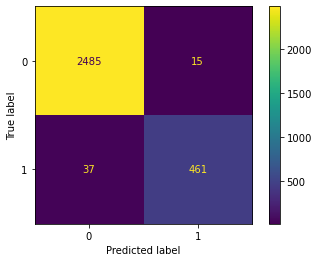

In [63]:
cm=confusion_matrix(y_test, y_pred, labels=rf2_cv.classes_)
displays=ConfusionMatrixDisplay(cm, display_labels=rf2_cv.classes_)
displays.plot(values_format="")
plt.show()

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, it's worth to inspect the splits of the decision tree model and the most important features in the random forest model.

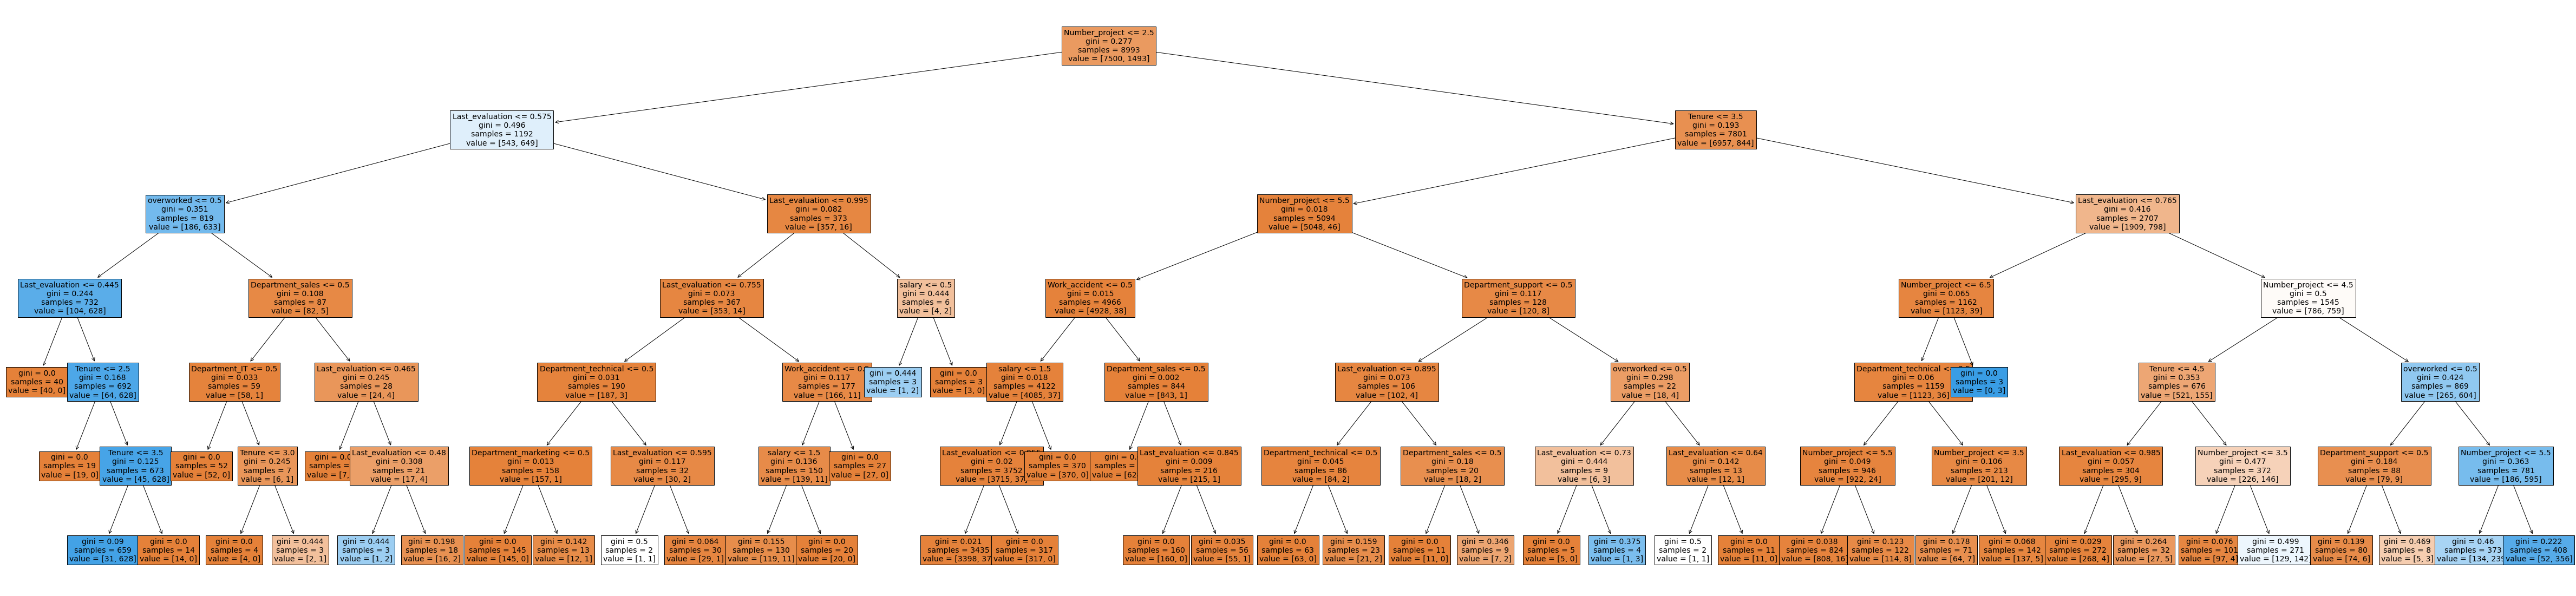

In [88]:
plt.figure(figsize=(85, 20))
plot_tree(dt2_cv.best_estimator_, max_depth=6, fontsize=14, class_names={0:"stayed", 1:"left"}, feature_names=x.columns, filled=True)
plt.show()

In [65]:
tree2_importance=pd.DataFrame(dt2_cv.best_estimator_.feature_importances_, index=x.columns, columns=["Feature importance score"])
tree2_importance=tree2_importance.sort_values(by="Feature importance score", ascending=False)
tree2_importance=tree2_importance[tree2_importance["Feature importance score"]>0]
tree2_importance

,Feature importance score
Last_evaluation,0.343958
Number_project,0.343385
Tenure,0.215681
overworked,0.093498
Department_support,0.001142
salary,0.000910
Department_sales,0.000607
Department_technical,0.000418
Work_accident,0.000183
Department_IT,0.000139


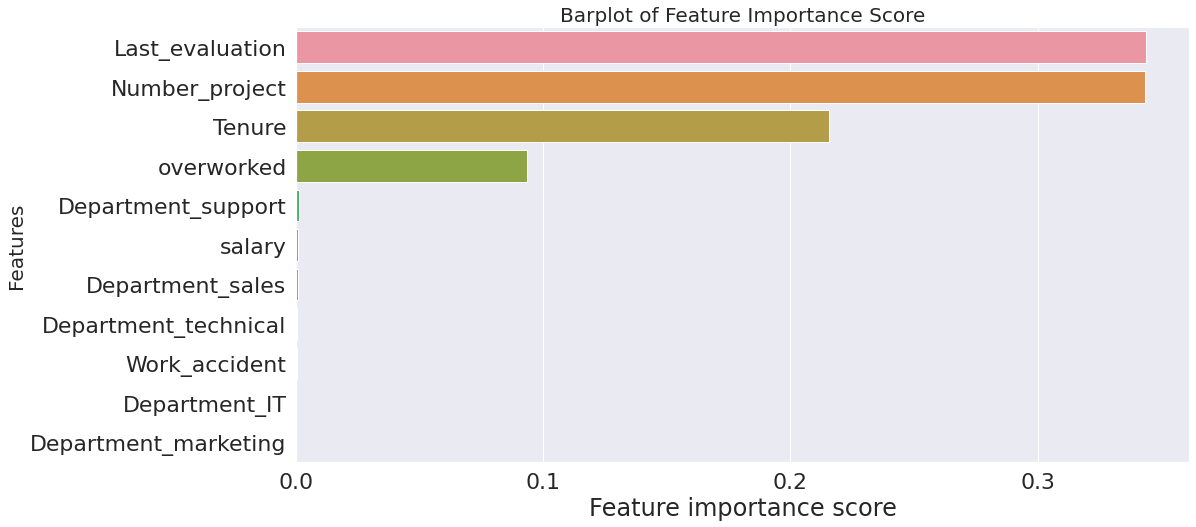

In [86]:
plt.figure(figsize=(16,8))
sns.barplot(data=tree2_importance, x="Feature importance score", y=tree2_importance.index, orient="h")
sns.set(font_scale=5)
plt.ylabel("Features", fontsize=20)
plt.title("Barplot of Feature Importance Score", fontsize=20)
plt.savefig('Feature_importances_DT1.png')
plt.show()


In [67]:
rf2_importances=pd.DataFrame(rf2_cv.best_estimator_.feature_importances_, index=x.columns, columns=["Feature Importance Score"])
rf2_importances=rf2_importances.sort_values(by="Feature Importance Score", ascending=False)
rf2_importances=rf2_importances[rf2_importances["Feature Importance Score"]>0]
rf2_importances=rf2_importances.iloc[0:10, :]
rf2_importances

,Feature Importance Score
Last_evaluation,0.359494
Number_project,0.356801
Tenure,0.199109
overworked,0.080984
salary,0.000644
Department_sales,0.000612
Department_support,0.000578
Department_technical,0.000414
Department_IT,0.000291
Work_accident,0.000276


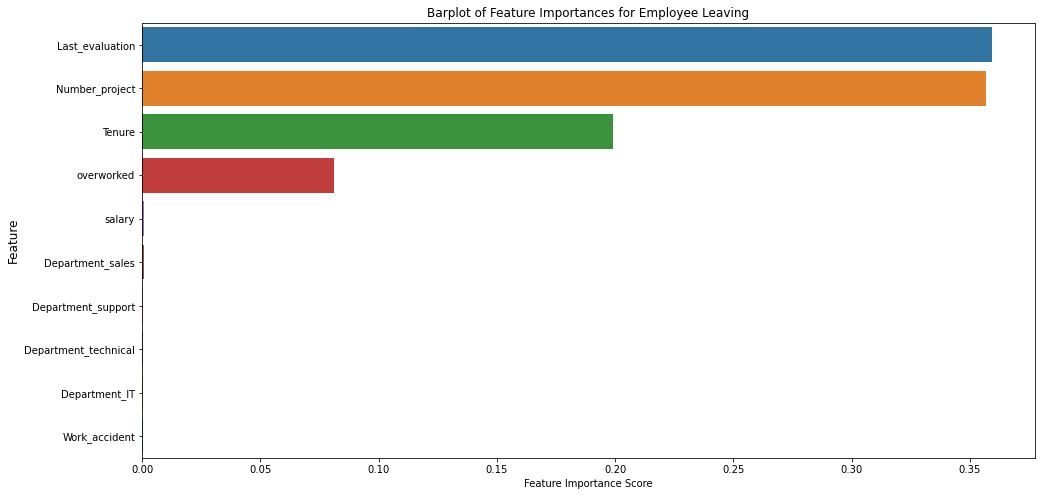

In [81]:
plt.figure(figsize=(16,8))
sns.barplot(data=rf2_importances, x="Feature Importance Score", y=rf2_importances.index, orient="h")
plt.ylabel("Feature", fontsize=12)
plt.title("Barplot of Feature Importances for Employee Leaving")
plt.savefig('Feature_importances_RF1.png')
plt.show()


The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and overworked have the highest importance, in that order. These variables contribute the most to the prediction of whther employees would stay or leave, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

Logistic Regression

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

Tree-based Machine Learning

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.



### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

Cap the number of projects that employees can work on.
Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
Either reward employees for working longer hours, or don't require them to do so.
If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

Next Steps

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when last_evaluation is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.